# **Data Analysis for Cab Investment**

## **HYPOTHESIS**


1. Is there any seasonality ? 

2. Demand of the cab industry tends to increase over time

3. The percentage of profitable trips change by city.

4. How the demand varies according to agewise?

5. Loyalty Rates.

6. Does the payment method fluctuate yearwise? Agewise? Citywise?


# **What is the business problem?**





Understand the market of the taxi's industries before investing

# **Data Intake**


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
cabdata= pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2 Assignment/Bases de Datos/Cab_Data.csv')
city =pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2 Assignment/Bases de Datos/City.csv')
customerid=pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2 Assignment/Bases de Datos/Customer_ID.csv')
transid=pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2 Assignment/Bases de Datos/Transaction_ID.csv')

### **CAB DATASET**

In [145]:
print('Filas =',cabdata.shape[0], '  y   Columnas = ', cabdata.shape[1])
cabdata.head()

Filas = 359392   y   Columnas =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


**Time Analysis - unit conversion**

In [146]:
from datetime import datetime, timedelta

In [147]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [148]:
cabdata['Date of Travel']=cabdata['Date of Travel'].apply(lambda x:to_date_format(x))

In [149]:
cabdata=cabdata.sort_values(by=['Date of Travel'])
cabdata=cabdata.reset_index(drop= True )

print('Filas =',cabdata.shape[0], '  y   Columnas = ', cabdata.shape[1])
cabdata.head(10)

Filas = 359392   y   Columnas =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


In [150]:
round(cabdata.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20


In [152]:
cabdata.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

### CITY DATASET

In [153]:
print(city.shape)
city.head(20)


(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [154]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

Data types conversions

In [155]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

### CUSTOMERS DATASET

In [156]:
print(customerid.shape)
customerid.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [157]:
customerid.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

Every data type is correct

### TRANSACTION ID DATASET

In [158]:
print(transid.shape)
transid.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [159]:
transid.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

### MASTER DATA

In [161]:
cabdata.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.2,202.54,135.864


In [162]:
city.head(1)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0


In [163]:
transid.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


In [164]:
customerid.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [165]:
masterdata = cabdata.merge(transid, on= 'Transaction ID').merge(customerid, on ='Customer ID').merge(city, on = 'City')

In [461]:
print(masterdata.shape)
masterdata.head()

(359392, 19)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year of Travel,Month of Travel,Day of Travel,Qa
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,66.6760,2016,1,1,NaN
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,14.3688,2016,3,25,NaN
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606.0,418859,127001,25.7090,2016,11,8,NaN
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,18.4932,2017,4,16,NaN
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,114.8280,2017,6,23,NaN


Finally, I will work on this "Master Dataset", a result from the merge of the 4 datasets provided to this assignment

# **EDA**

### Description of our Dataset


In [167]:
round(masterdata.describe(include='all'),2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,359392.00,359392,359392,359392,359392.00,359392.00,359392.00,359392.00,359392,359392,359392.00,359392.00,359392.00,359392.00
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,2018-01-04 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,NaN,NaN
first,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10220761.19,NaN,NaN,NaN,22.57,423.44,286.19,19191.65,NaN,NaN,35.34,15048.82,3132198.04,158365.58
std,126805.80,NaN,NaN,NaN,12.23,274.38,157.99,21012.41,NaN,NaN,12.59,7969.41,3315194.39,100850.05
min,10000011.00,NaN,NaN,NaN,1.90,15.60,19.00,1.00,NaN,NaN,18.00,2000.00,248968.00,3643.00
25%,10110809.75,NaN,NaN,NaN,12.00,206.44,151.20,2705.00,NaN,NaN,25.00,8424.00,671238.00,80021.00


### Features Analysis

**KM TRAVELLED**

Text(0.5, 0, 'Km Travelled')

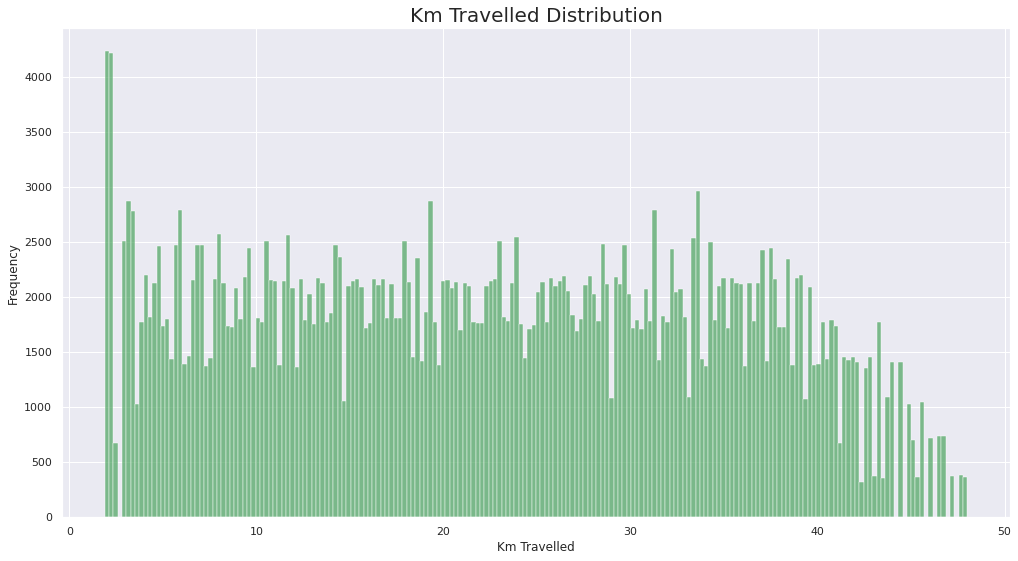

In [473]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x="KM Travelled",bins=200, color= 'g')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

**Price**

Text(0.5, 0, 'Price Charged')

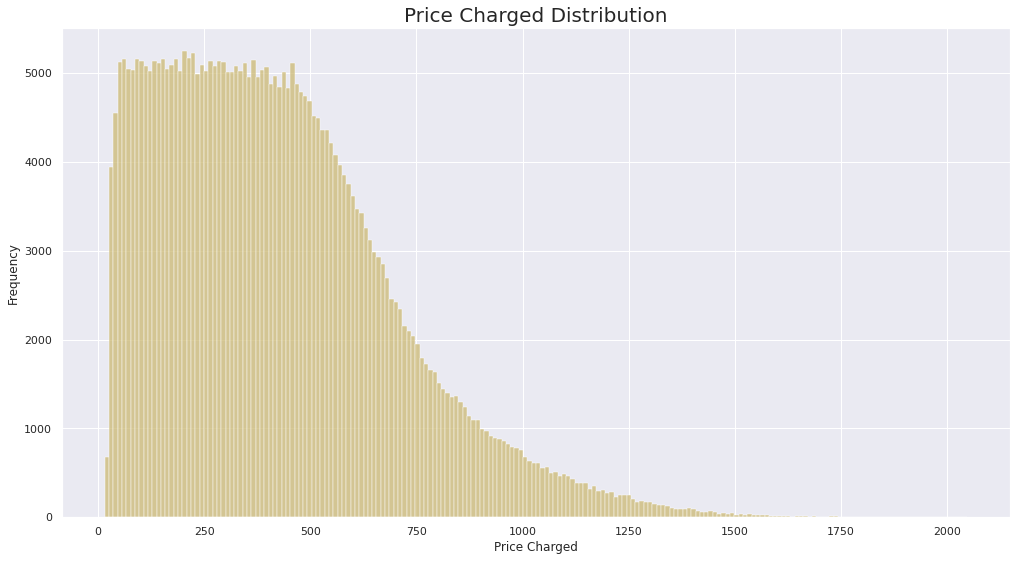

In [471]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x="Price Charged",bins=200 , color= 'y')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

**Cost of Trip**

Text(0.5, 0, 'Cost of Trip')

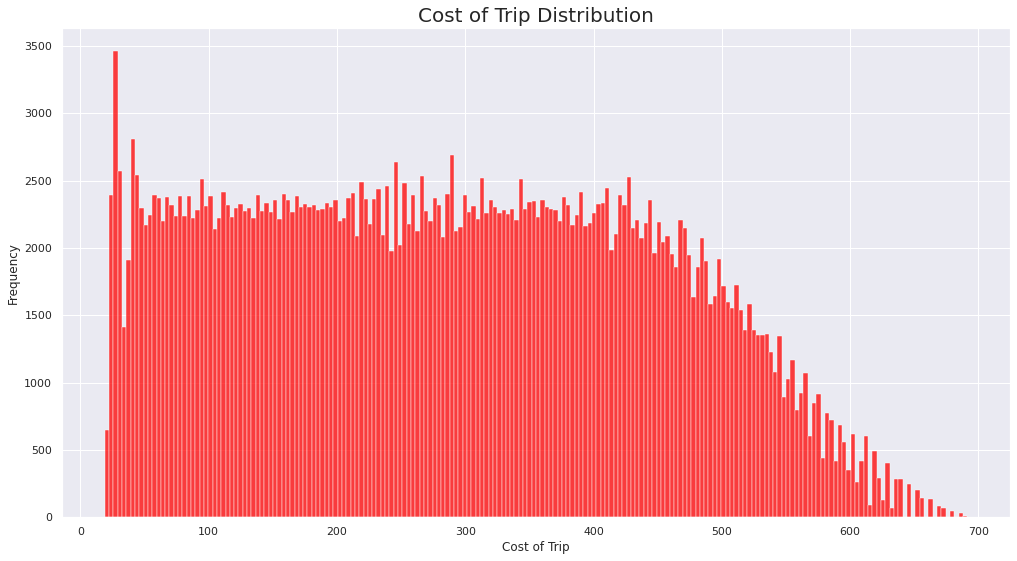

In [475]:
plt.figure(figsize=(17,9))
sns.histplot(data= masterdata,x="Cost of Trip",bins=200 , color= 'red')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

Text(0.5, 0, 'Age')

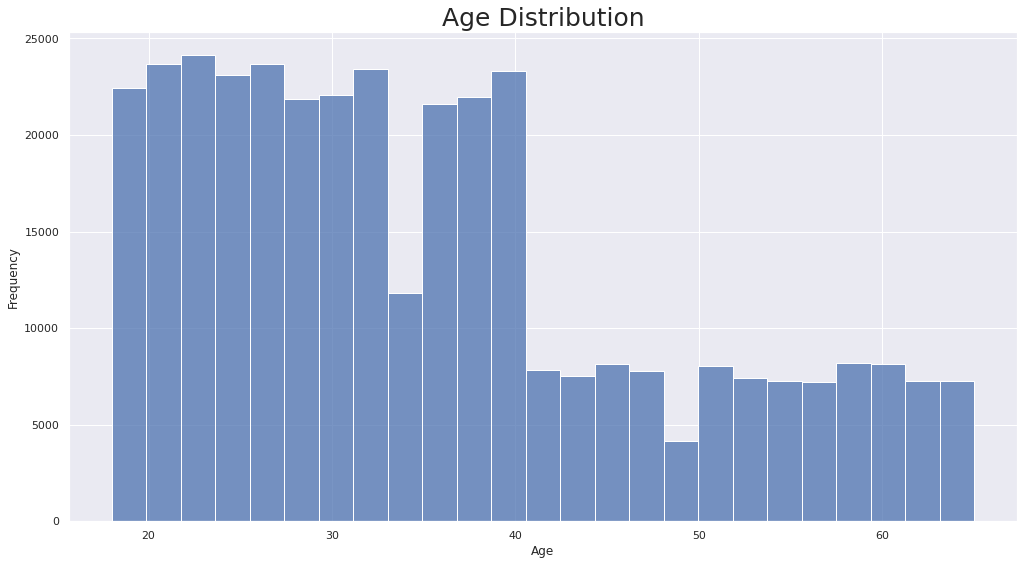

In [492]:
plt.figure(figsize=(17,9))
sns.histplot(data=masterdata, x='Age', bins=25)
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')


**COST per KM**


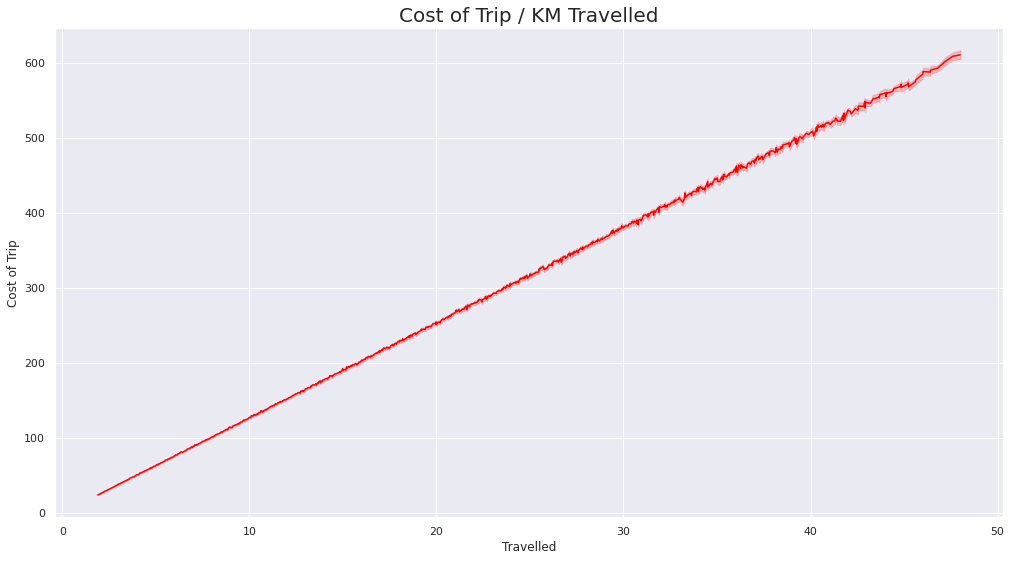

In [476]:
plt.figure(figsize=(17,9))
sns.lineplot(data=masterdata, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

**Payment Mode**


Text(0.5, 0, 'Payment Mode')

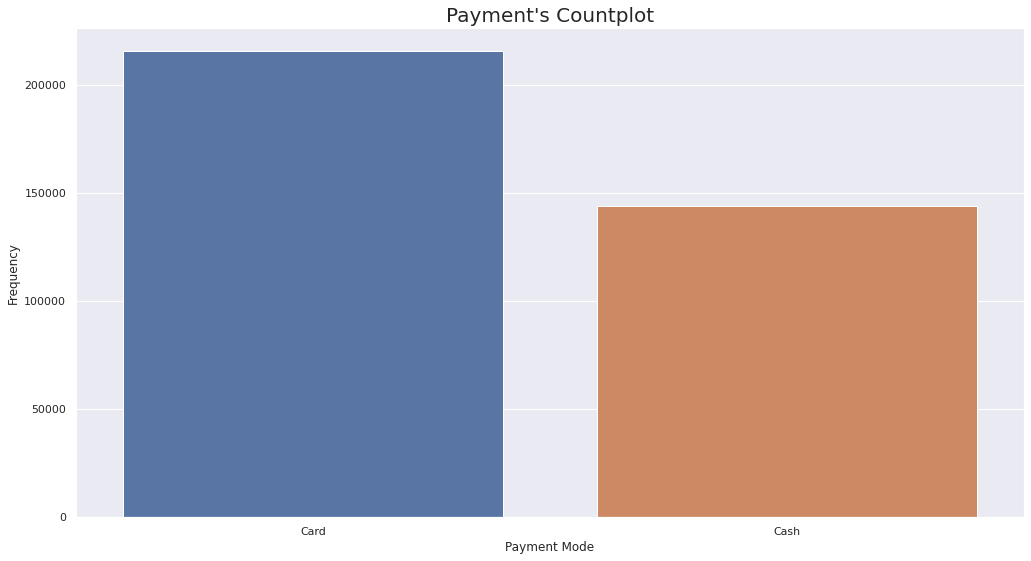

In [477]:
plt.figure(figsize=(17,9))
sns.countplot(data=masterdata, x="Payment_Mode")
plt.title("Payment's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

**GENDER**

Text(0.5, 0, 'Gender')

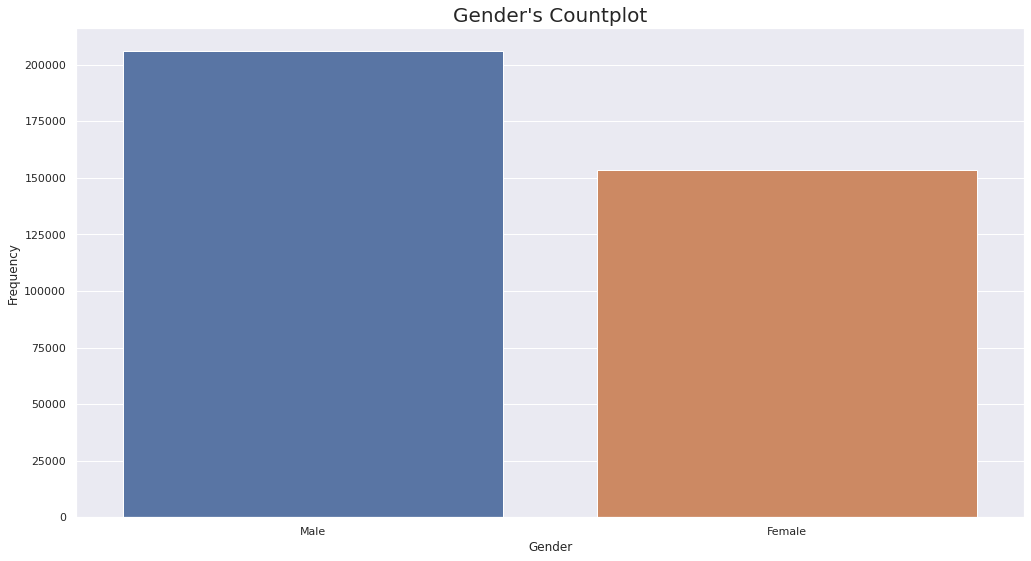

In [478]:
plt.figure(figsize=(17,9))
sns.countplot(data=masterdata, x="Gender")
plt.title("Gender's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Gender')

**CORRELATIONS**

In [175]:
masterdata.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


### Check Data Type

In [176]:
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [493]:
masterdata['Income (USD/Month)'] = masterdata['Income (USD/Month)'].astype(float)
masterdata['Population'] = masterdata['Population'].astype(int)
masterdata['Users'] = masterdata['Users'].astype(int)
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int64
Users                          int64
Profit                       float64
Year of Travel                 int64
Month of Travel                int64
Day of Travel                  int64
Qa                           float64
dtype: object

Now, every feature is in an appropiate data type.

### Missing Values

In [179]:
masterdata.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

There are not missing values

### Check Duplicates

In [494]:
duplicated_rows = masterdata[masterdata.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


### **OUTLIERS**

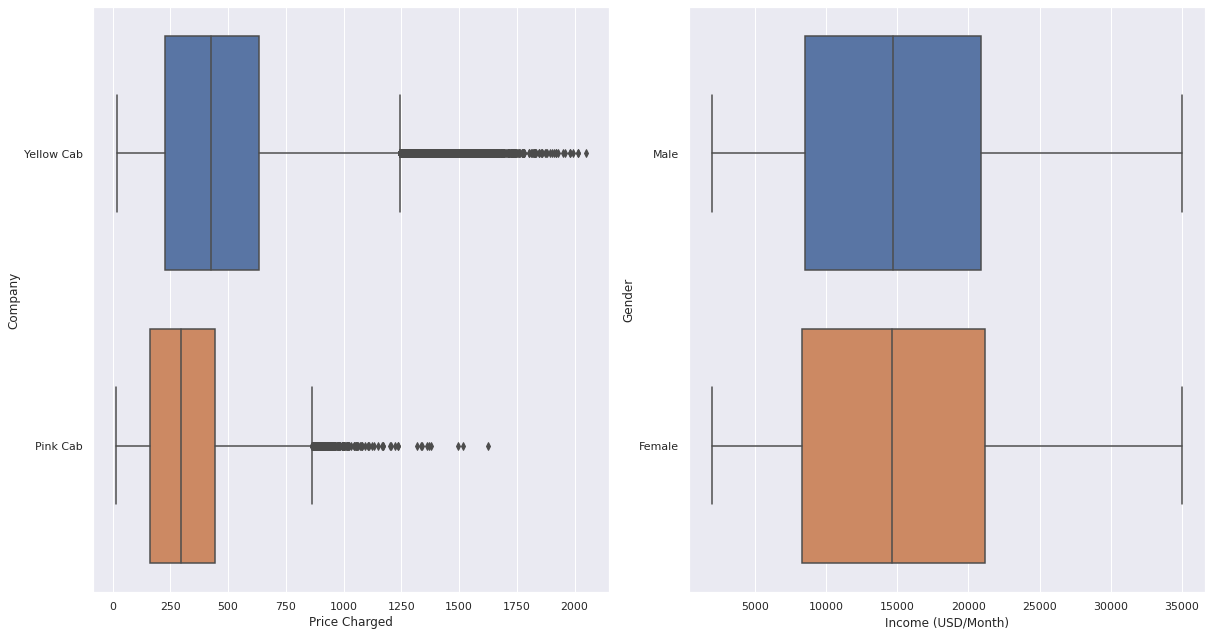

In [503]:
plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = masterdata, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = masterdata, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

Outliers are present in the `Price Charged `feature, but as we do not have any further information of the components that made the "Price Charged", I will not treat it as an outlier


### **Time Series**

Here I want to create a new dataset that will be the same as Master Datset, but the feature 'Date of Travel' will be it's index so as to work properly Time Series Visualizations

In [506]:
masterdata['Year of Travel'] = masterdata['Date of Travel'].dt.year
masterdata['Month of Travel'] = masterdata['Date of Travel'].dt.month
masterdata['Day of Travel'] = masterdata['Date of Travel'].dt.day
masterdata_st['Profit'] = masterdata_st['Price Charged'] -masterdata_st['Cost of Trip']

In [507]:
masterdata_st=masterdata.set_index('Date of Travel')

In [509]:
masterdata_st.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year of Travel,Month of Travel,Day of Travel,Qa
Date of Travel,,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,66.6760,2016,1,1,NaN
2016-01-01,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,13894,Card,Male,32,21898.0,1177609,27247,821.4468,2016,1,1,NaN
2016-01-01,10001242,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892.0,1177609,27247,418.6236,2016,1,1,NaN
2016-01-01,10000885,Yellow Cab,NEW YORK NY,32.20,940.73,452.0880,1698,Card,Male,23,22120.0,8405837,302149,488.6420,2016,1,1,NaN
2016-01-01,10000961,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765.0,8405837,302149,380.8472,2016,1,1,NaN


### **YELLOW CAB VS PINK CAB**

Finally I want to have datsets from each company: Pink and Yellow Cab Company

In [192]:
yellowcabst= masterdata_st[masterdata_st.Company.isin(['Yellow Cab'])]
print(yellowcabst.shape)
yellowcabst.head()
yellowcab= masterdata[masterdata.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()

(274681, 17)
(274681, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year of Travel,Month of Travel,Day of Travel
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,66.6760,2016,1,1
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,14.3688,2016,3,25
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,18.4932,2017,4,16
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,114.8280,2017,6,23
6,10261473,2017-11-16,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,52536,Cash,Male,24,10606.0,418859,127001,35.7320,2017,11,16


In [193]:
pinkcabst= masterdata_st[masterdata_st.Company.isin(['Pink Cab'])]
print(pinkcabst.shape)
pinkcabst.head()
pinkcab= masterdata[masterdata.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84711, 17)
(84711, 18)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year of Travel,Month of Travel,Day of Travel
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.621,52536,Cash,Male,24,10606.0,418859,127001,25.709,2016,11,8
5,10249981,2017-10-30,Pink Cab,WASHINGTON DC,28.00,424.20,280.000,52536,Card,Male,24,10606.0,418859,127001,144.200,2017,10,30
19,10242139,2017-10-19,Pink Cab,WASHINGTON DC,26.78,371.96,313.326,53683,Card,Male,26,9389.0,418859,127001,58.634,2017,10,19
29,10143658,2017-02-10,Pink Cab,WASHINGTON DC,42.55,504.03,489.325,53126,Cash,Male,24,3032.0,418859,127001,14.705,2017,2,10
63,10125156,2016-12-20,Pink Cab,WASHINGTON DC,10.00,151.06,104.000,51580,Card,Male,51,6115.0,418859,127001,47.060,2016,12,20


# **Profit Analysis**

## **Profits**

### **Annual Profits**

In [541]:
y=yellowcabst.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkcabst.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)
y=yellowcabst.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkcabst.Profit.resample('m').sum()
ppm= pd.DataFrame(p)


                      Profit
Date of Travel              
2016-12-31      1.407389e+07
2017-12-31      1.646427e+07
2018-12-31      1.348222e+07
                     Profit
Date of Travel             
2016-12-31      1739882.628
2017-12-31      2015100.657
2018-12-31      1552345.036


In [542]:
ypy['ProfitORides']= ypy['Profit']/yellowcab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pinkcab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellowcab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pinkcab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellowcabst['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pinkcabst['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellowcabst['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pinkcabst['KM Travelled'].resample('m').sum()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

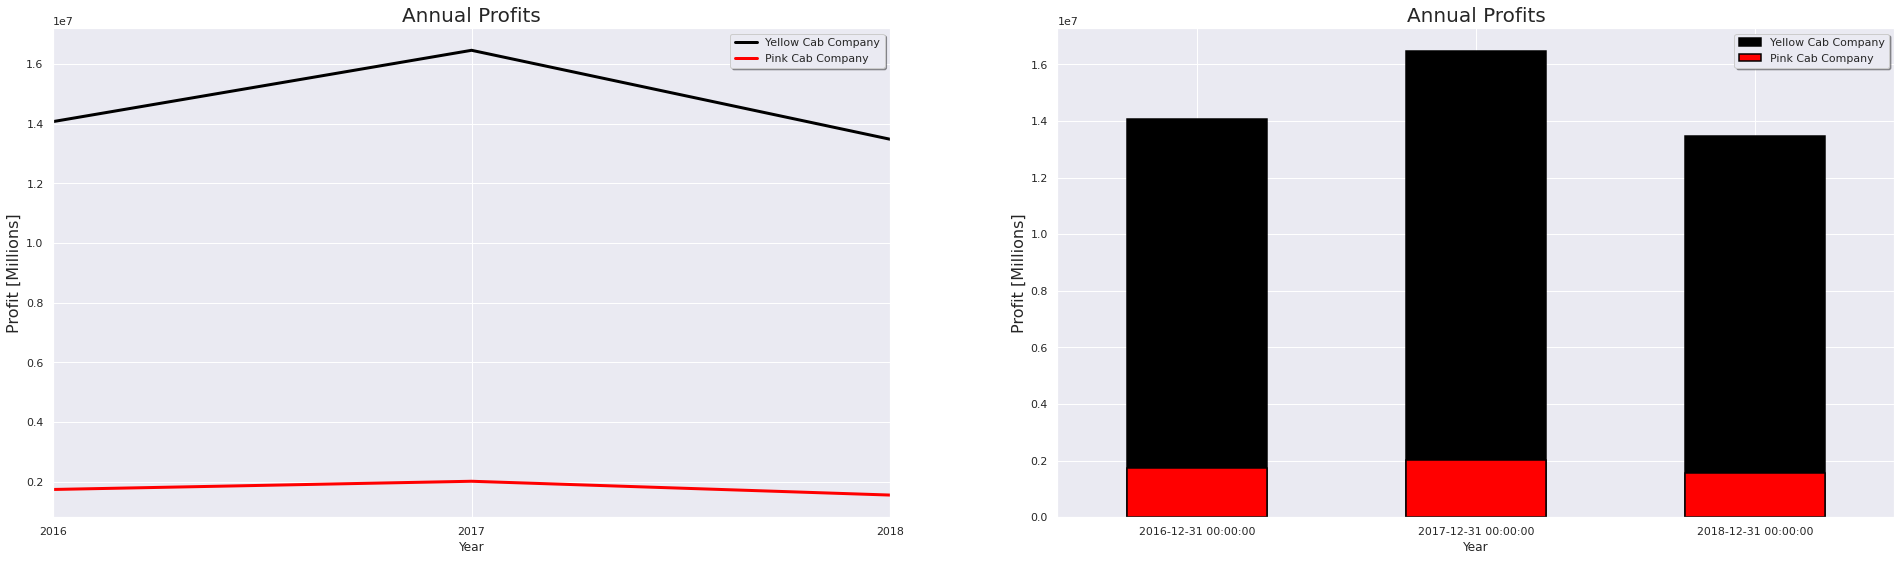

In [568]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,1)
fig= yellowcabst.Profit.resample('Y').sum().plot.line(color = 'black',label='Yellow Cab Company',linewidth=3)
fig=pinkcabst.Profit.resample('Y').sum().plot.line(color = 'red',label='Pink Cab Company',linewidth=3)
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
fig= yellowcabst.Profit.resample('Y').sum().plot.bar(color = 'black',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=pinkcabst.Profit.resample('Y').sum().plot.bar(color = 'red',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')
plt.legend(loc='best', shadow=True)
plt.xticks(rotation=0)


### **Monthly Profits**

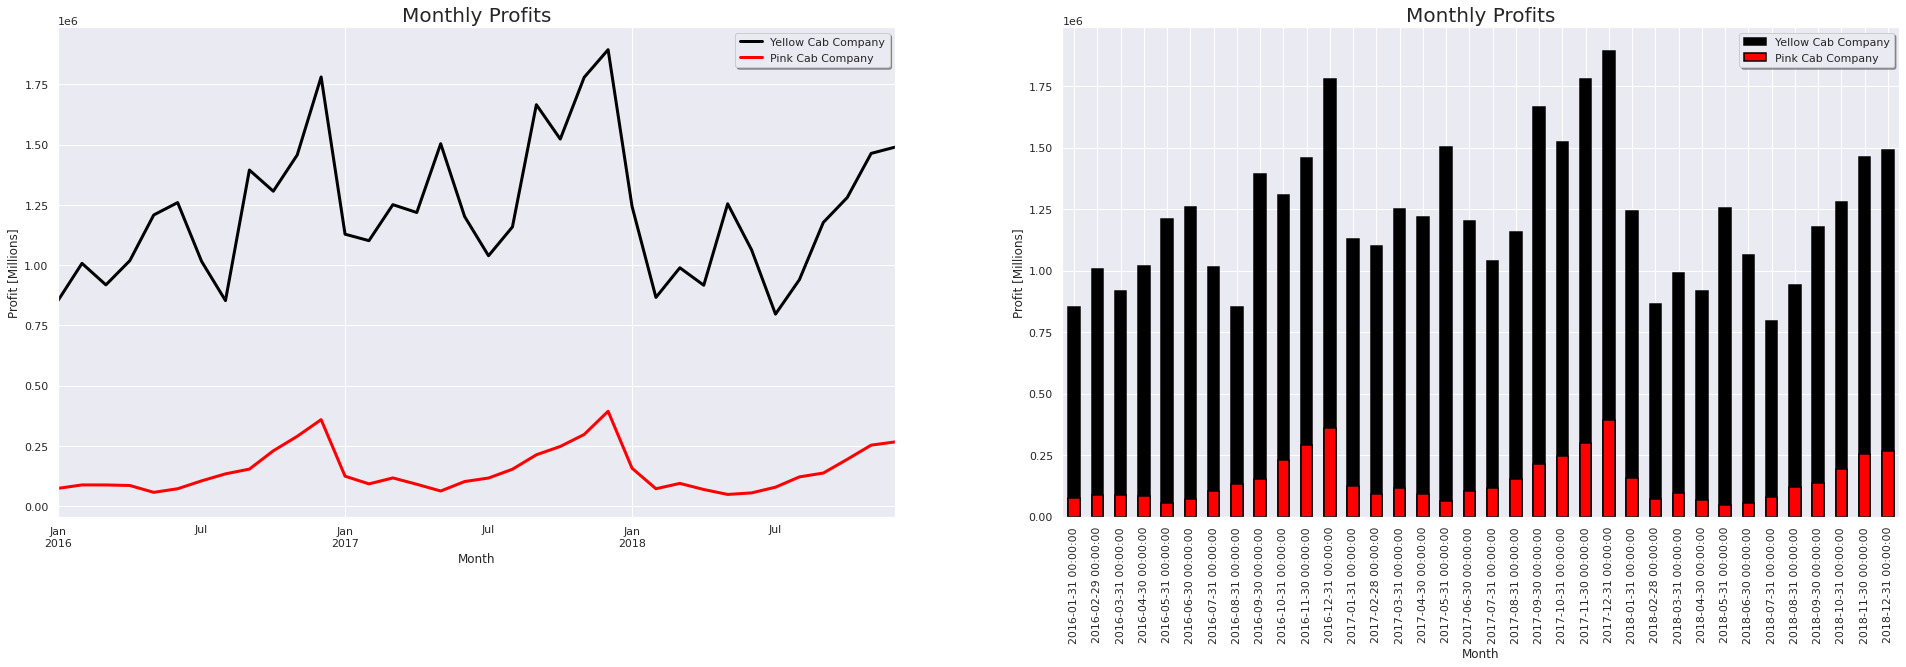

In [569]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,1)
fig= yellowcabst.Profit.resample('m').sum().plot.line(color = 'black',label='Yellow Cab Company',linewidth=3)
fig=pinkcabst.Profit.resample('m').sum().plot.line(color = 'red',label='Pink Cab Company',linewidth=3)
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

plt.subplot(1,2,2)
fig= yellowcabst.Profit.resample('m').sum().plot.bar(color = 'black',label='Yellow Cab Company',edgecolor='black',linewidth=1.5)
fig=pinkcabst.Profit.resample('m').sum().plot.bar(color = 'red',label='Pink Cab Company',edgecolor='black',linewidth=1.5)
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

## **Average profits over Rides**

### **Annual Profits Over Rides**

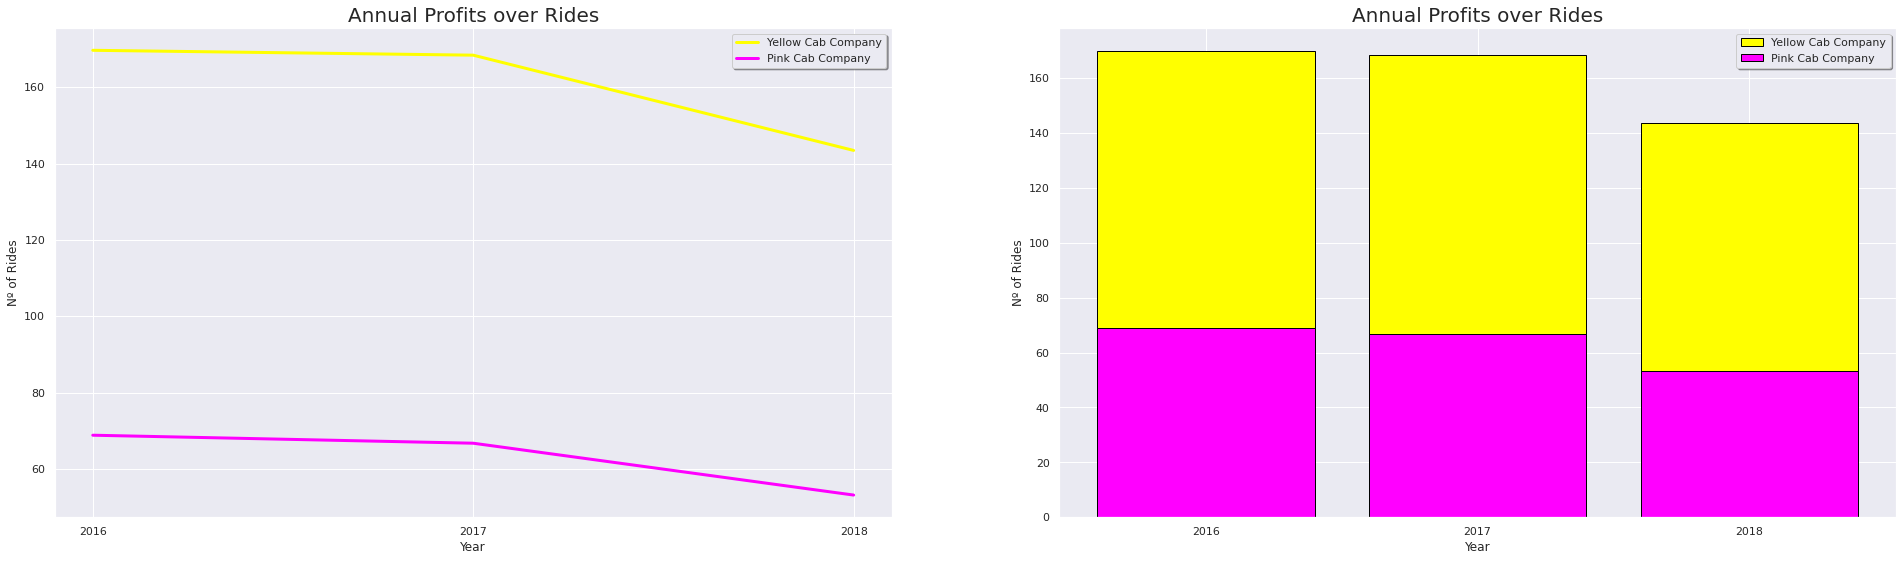

In [602]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy, color= 'yellow',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = 'magenta',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = ypy, color= 'yellow',label='Yellow Cab Company',linewidth=3)
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = ppy, color = 'magenta',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)


### **Monthly profits over**

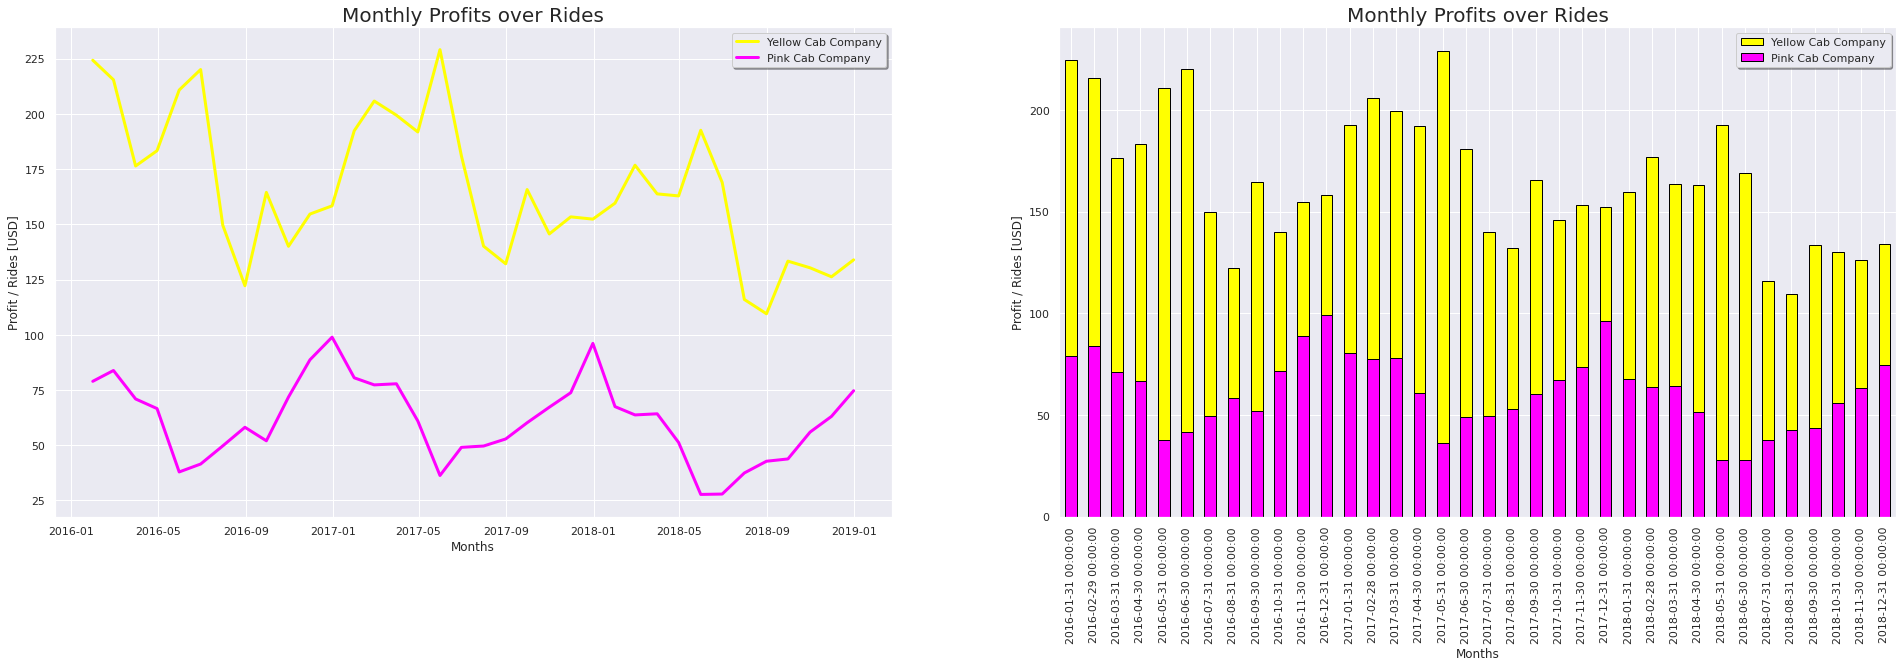

In [590]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)

ypm.ProfitORides.resample('m').sum().plot.bar(color = 'yellow', edgecolor = 'black',label='Yellow Cab Company')
ppm.ProfitORides.resample('m').sum().plot.bar(color = 'magenta',edgecolor='black',label= 'Pink Cab Company')
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Months')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypm.ProfitORides.resample('m').sum()
x2= ppm.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = ypm, color= 'yellow', linewidth = 3,label='Yellow Cab Company')
plt.plot(x2.index,'ProfitORides', data = ppm, color = 'magenta',linewidth = 3,label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)


## **Average profits over KM**

### **Annual profits over KM**

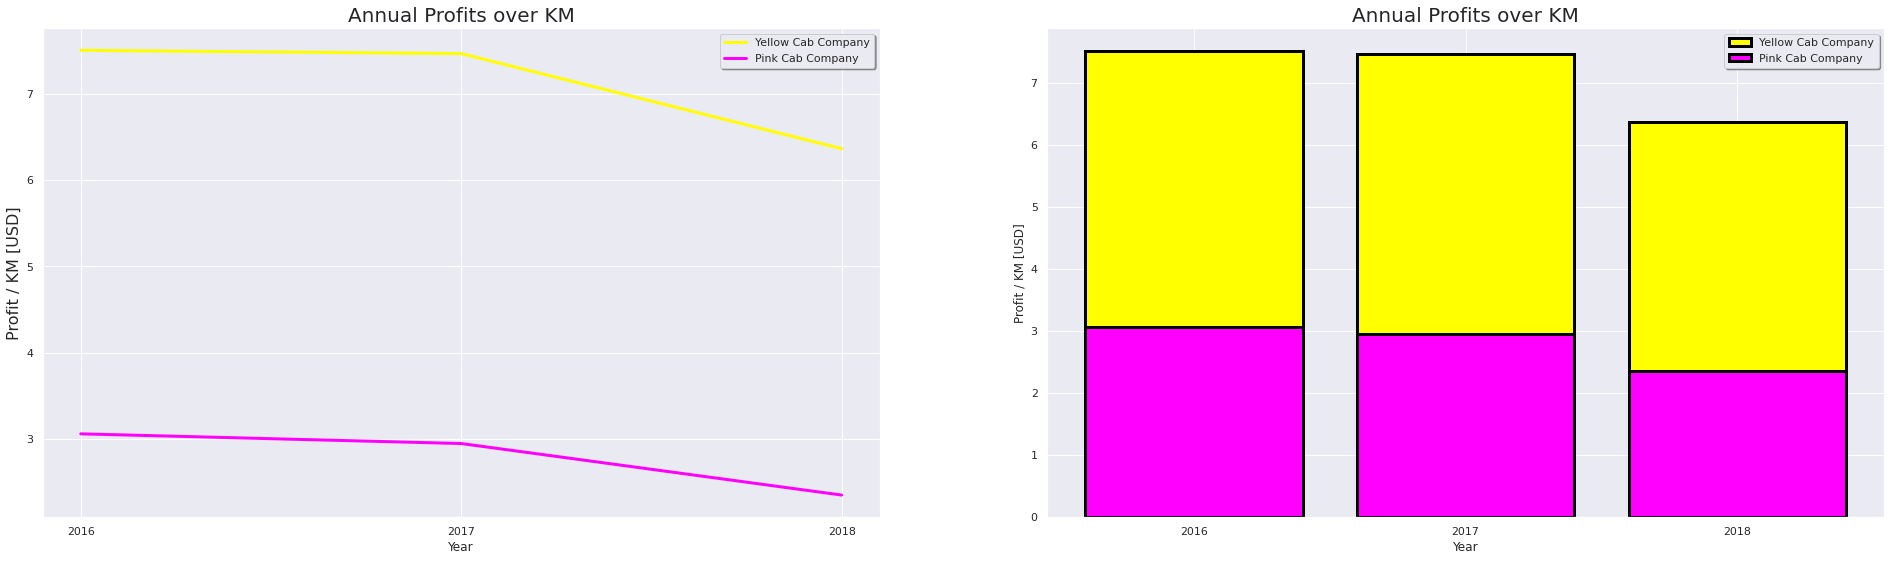

In [601]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data = ypy, color= 'yellow',edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = ppy, color = 'magenta',edgecolor = 'black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.ylabel('Profit / KM [USD]', fontsize=16)
plt.plot(x1.index.strftime('%Y'),'ProfitOKM', data = ypy, color= 'yellow',label='Yellow Cab Company',linewidth=3)
plt.plot(x2.index.strftime('%Y'),'ProfitOKM', data = ppy, color = 'magenta',label='Pink Cab Company',linewidth=3)
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

### **Monthly profit over KM**

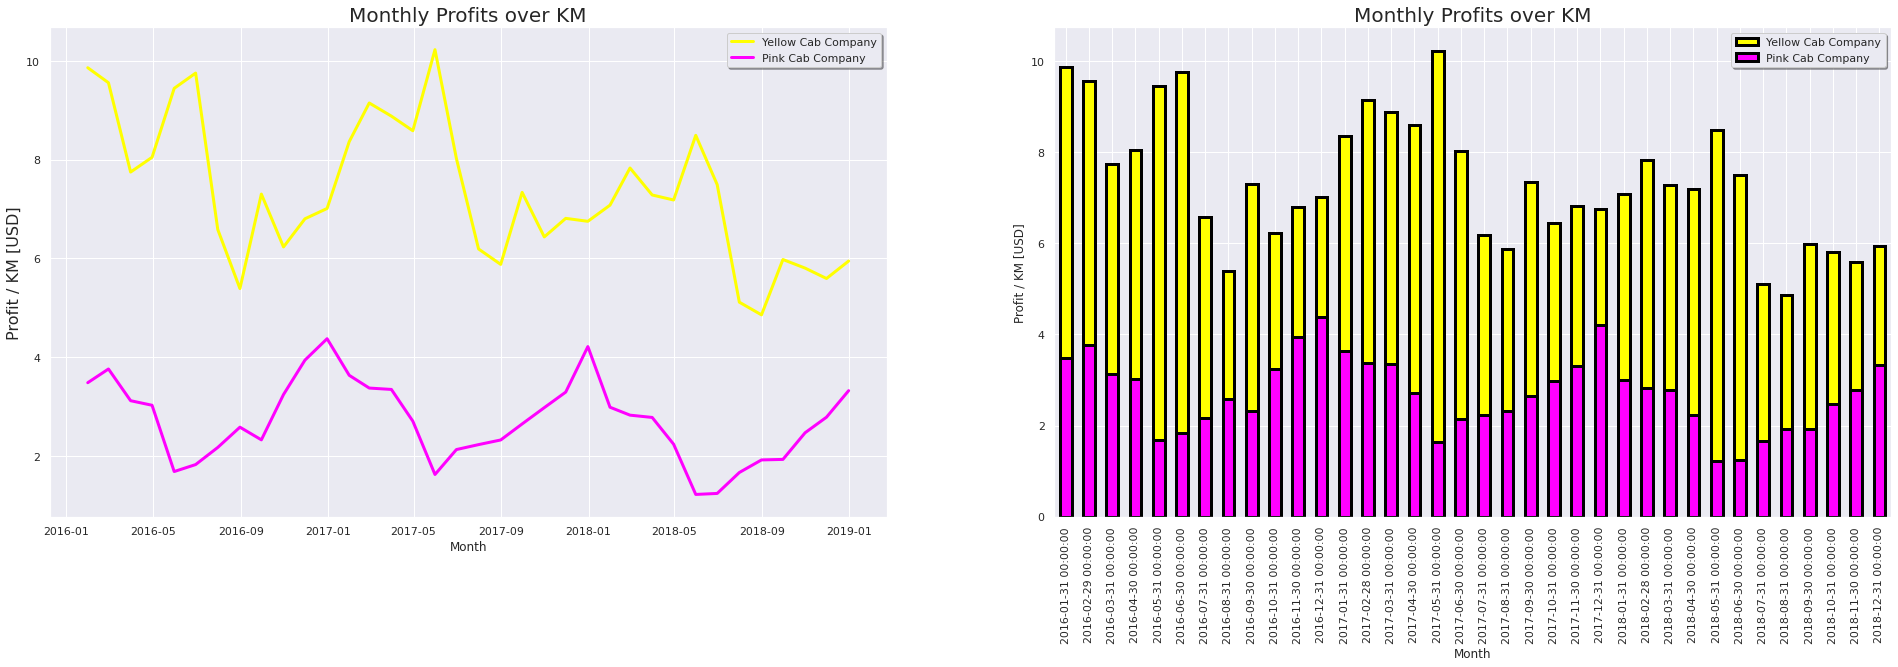

In [604]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
ypm.ProfitOKM.resample('m').sum().plot.bar(color = 'yellow', edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
ppm.ProfitOKM.resample('m').sum().plot.bar(color = 'magenta',edgecolor='black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=90)
plt.title('Monthly Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypm.ProfitOKM.resample('m').sum()
x2= ppm.ProfitOKM.resample('m').sum()
plt.ylabel('Profit / KM [USD]', fontsize=16)
plt.plot(x1.index,'ProfitOKM', data = ypm, color= 'yellow',label='Yellow Cab Company',linewidth=3)
plt.plot(x2.index,'ProfitOKM', data = ppm, color = 'magenta',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Monthly Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)


## **Average profits per City**

Text(1, 3499104.0, "New York's Profit are over 26.45 Millions of USD")

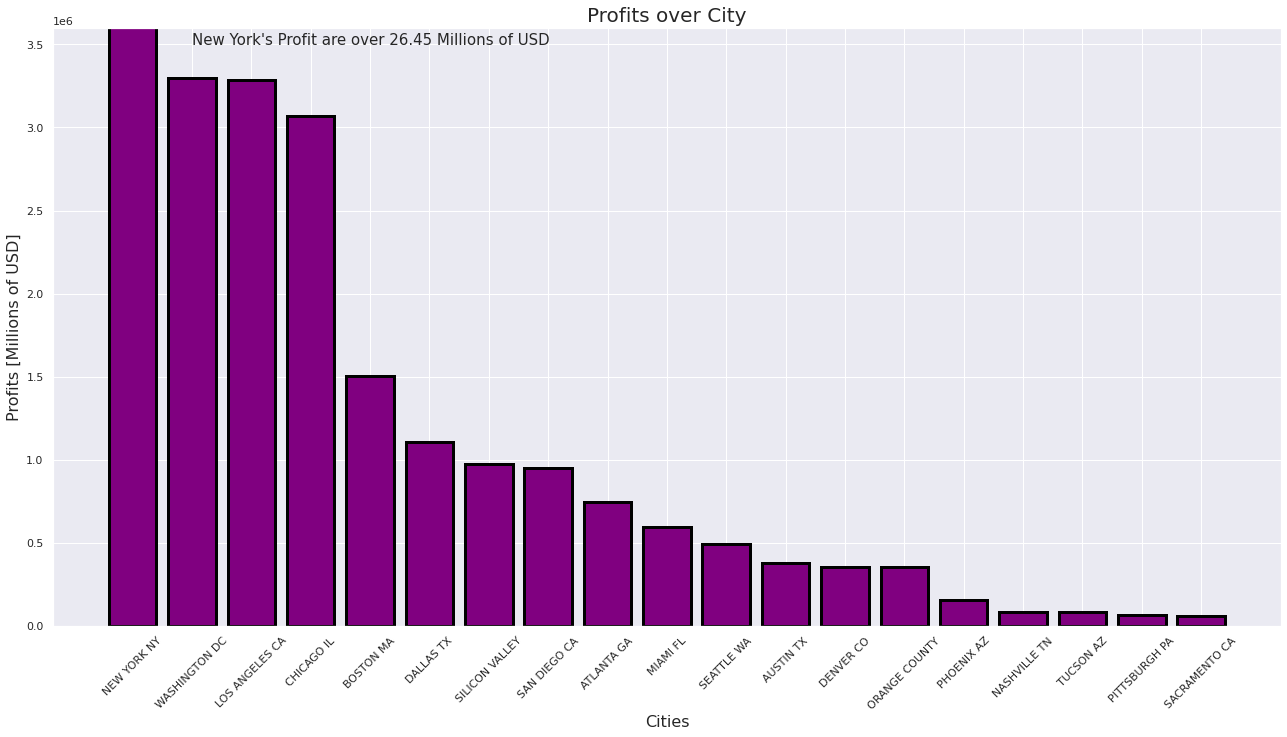

In [609]:
ppc= yellowcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
plt.bar(x= ppc.index, height='Profit', data = ppc,edgecolor = 'black',color="purple",linewidth=3)
plt.xticks(rotation=45)
plt.ylim(0,3.599104e+06)
plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Profits over City',fontsize=20)

plt.text(x= 1, y=3.499104e+06, s=  "New York's Profit are over 26.45 Millions of USD", fontsize=15)

## **Profitable Rides % Citywise**

In [610]:
yellowcabnp=yellowcab[(yellowcab['Profit']<0)]
yellowcabnp= yellowcabnp.City.value_counts()
yellowcabnp=pd.DataFrame(yellowcabnp)
yellowcabnp.columns=['q']
pinkcabnp=pinkcab[(pinkcab['Profit']<0)]
pinkcabnp= pinkcabnp.City.value_counts()
pinkcabnp=pd.DataFrame(pinkcabnp)
pinkcabnp.columns=['q']

In [611]:
yellowcabnp['Q']= yellowcab.City.value_counts() - yellowcabnp['q']
yellowcabnp['per']= ((1- (yellowcabnp['q'] / (yellowcabnp['q']+yellowcabnp['Q'])))*100)
yellowcabnp= yellowcabnp[['Q','q','per']]
yellowcabnp['Q']= yellowcabnp['Q'].astype(int)
yellowcabnp = yellowcabnp.sort_values(by='per', ascending= False )
yellowcabnp.head(30)
yellowcabnp.shape
pinkcabnp['Q']= pinkcab.City.value_counts() - pinkcabnp['q']
pinkcabnp['per']= ((1- (pinkcabnp['q'] / (pinkcabnp['q']+pinkcabnp['Q'])))*100)
pinkcabnp= pinkcabnp[['Q','q','per']]
pinkcabnp['Q']= pinkcabnp['Q'].astype(int)
pinkcabnp = pinkcabnp.sort_values(by='per', ascending= False )
pinkcabnp.head(30)
pinkcabnp.shape

(19, 3)

Text(0.5, 0, 'Cities')

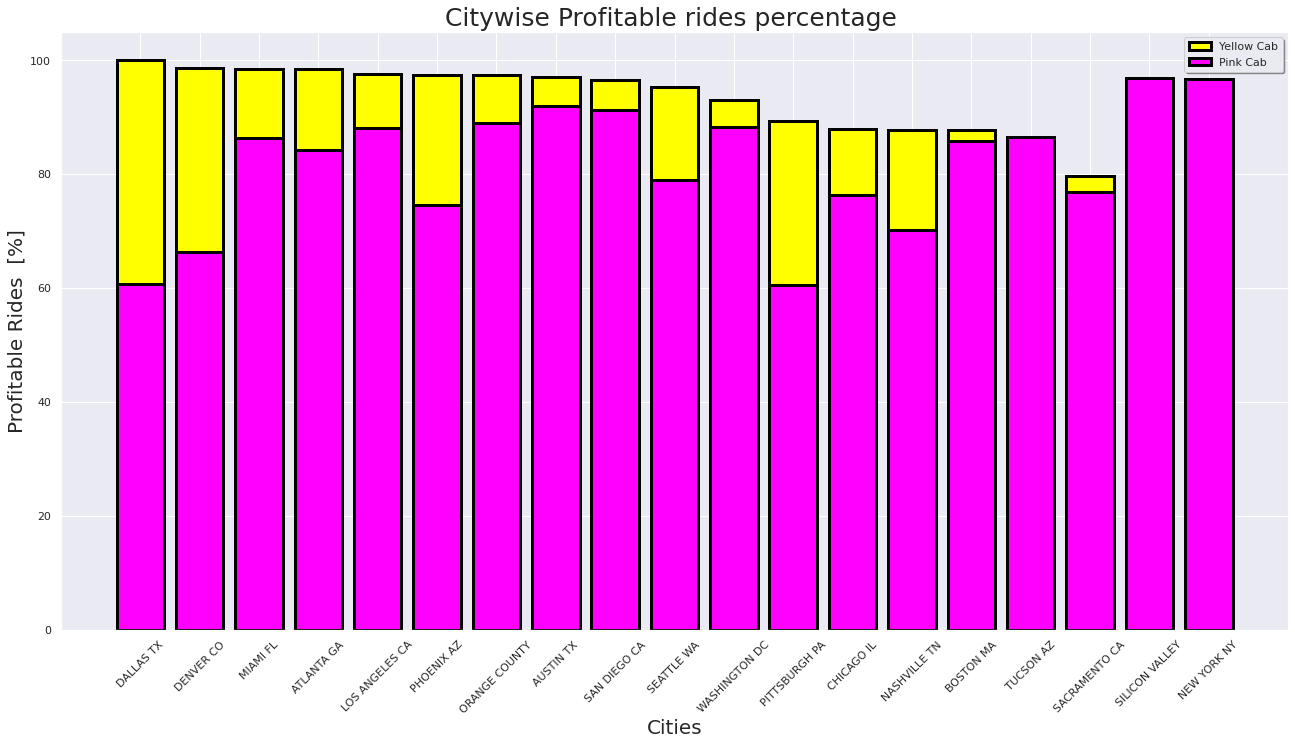

In [613]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowcabnp.index, height='per', data = yellowcabnp,edgecolor = 'black',color = 'yellow',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkcabnp.index, height='per', data = pinkcabnp,edgecolor = 'black',color = 'magenta',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Citywise Profitable rides percentage ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)

In [ ]:
yellowcab['Profit'].value_counts().resample('m').sum()

# **Demand Analysis**

## **Demand**

### **Demanda anual**

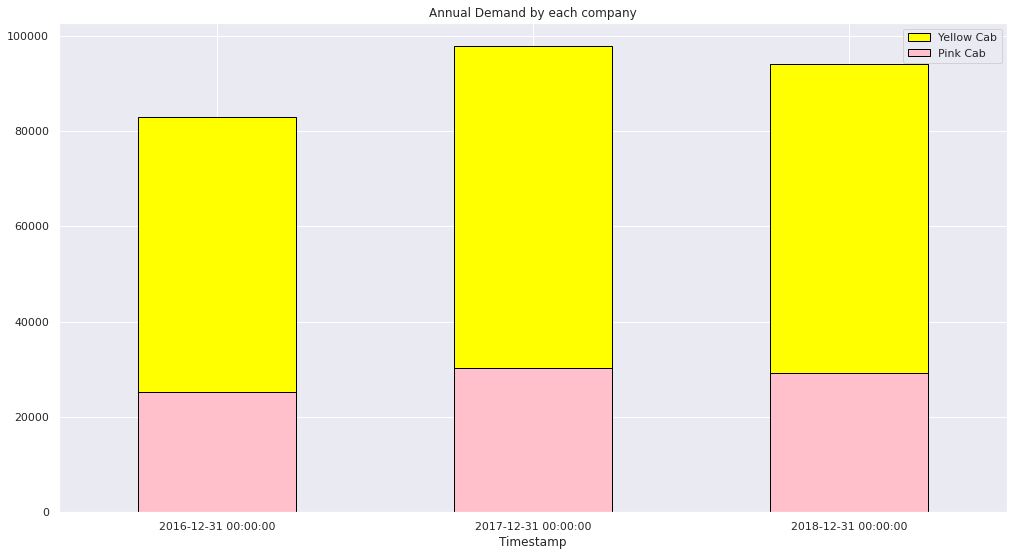

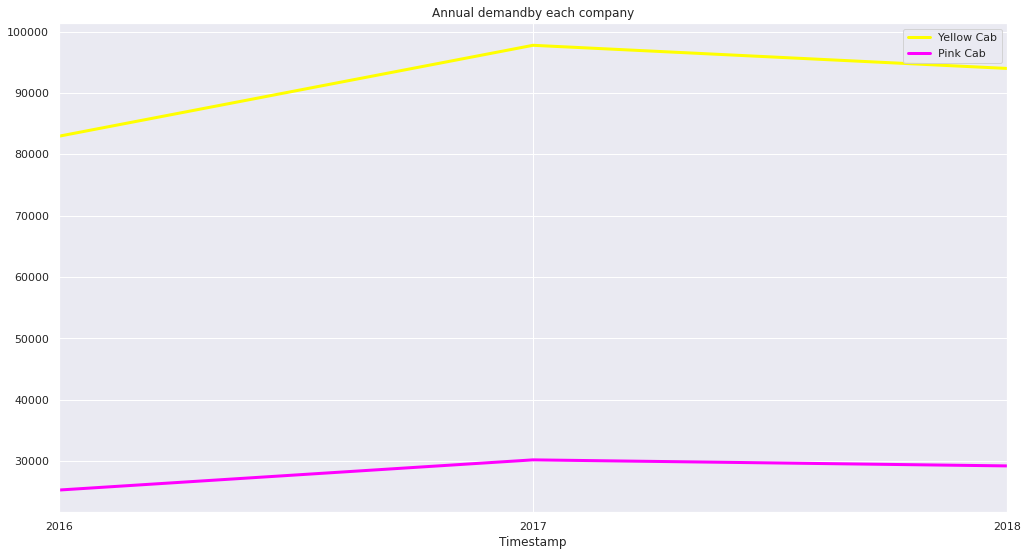

In [623]:
plt.figure(figsize=(17,9))
g=yellowcab['Date of Travel'].value_counts().resample('Y').sum().plot.bar(color = 'yellow', edgecolor ='black')
g= pinkcab['Date of Travel'].value_counts().resample('Y').sum().plot.bar(color = 'pink',edgecolor ='black')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Annual Demand by each company')
plt.xlabel('Timestamp')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(17,9))
yellowcab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'yellow',linewidth =3)
pinkcab['Date of Travel'].value_counts().resample('Y').sum().plot.line(color = 'magenta',linewidth =3)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Annual demandby each company')
plt.xlabel('Timestamp')

plt.show()
            

### **Demanda Mensual**


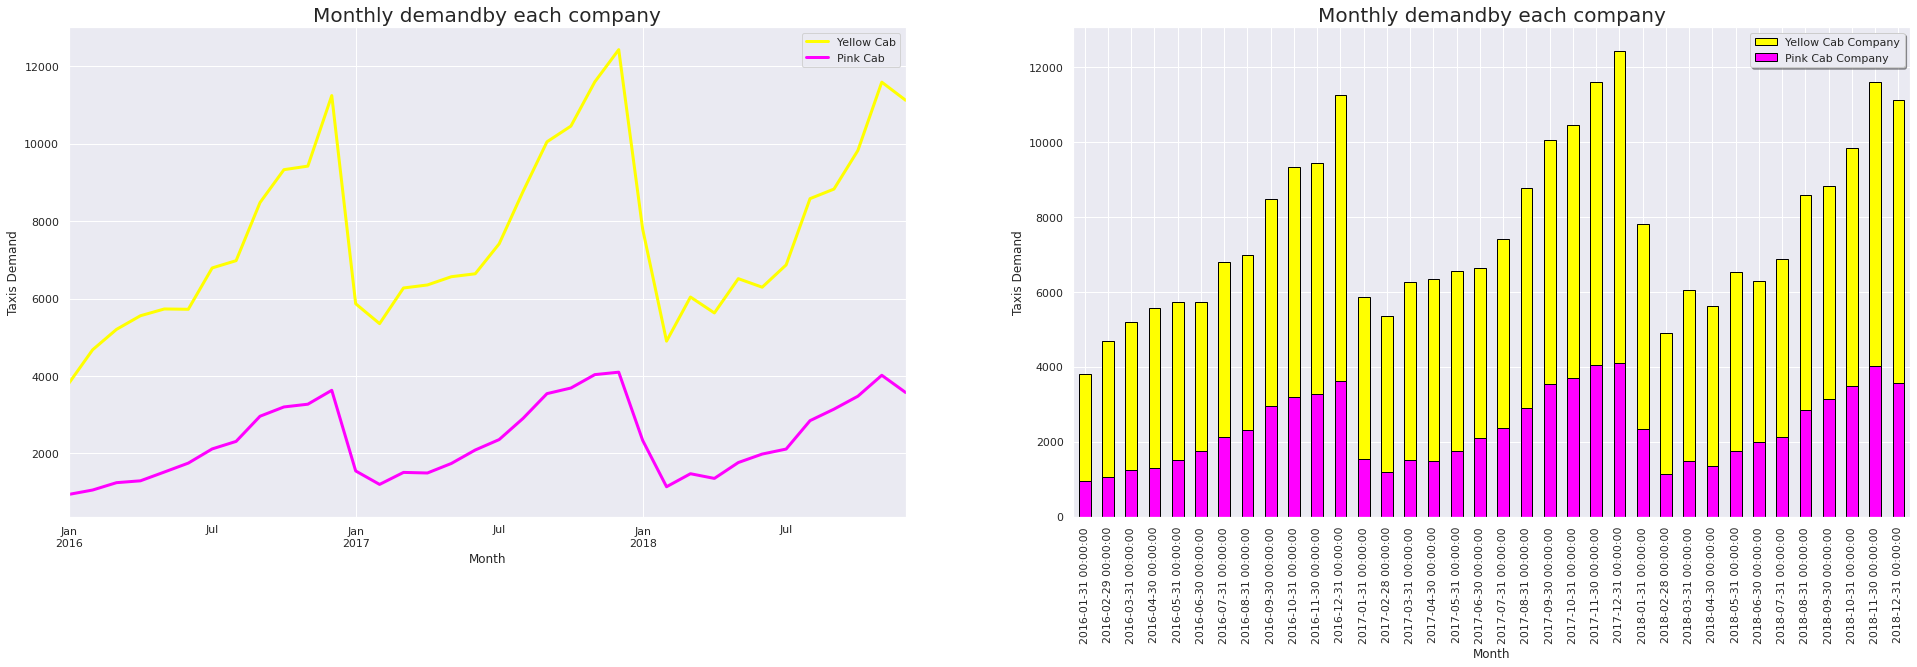

In [628]:
plt.figure(figsize=(33,9))
plt.subplot(1,2,2)
yellowcab['Date of Travel'].value_counts().resample('m').sum().plot.bar( color= 'yellow',edgecolor = 'black',label='Yellow Cab Company')
pinkcab['Date of Travel'].value_counts().resample('m').sum().plot.bar(color = 'magenta',edgecolor = 'black',label='Pink Cab Company')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Monthly demandby each company',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Taxis Demand')



plt.legend(loc='best', shadow=True)


plt.subplot(1,2,1)
yellowcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color= 'yellow',label='Yellow Cab Company',linewidth=3)
pinkcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'magenta',label='Pink Cab Company',linewidth=3)
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Monthly demandby each company',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Taxis Demand')

plt.show()

## **Demand Agewise**

In [626]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= '18-25'
a22= a2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= '26-40'
a33= a3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= '40-60'
a44= a4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= '60+'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])

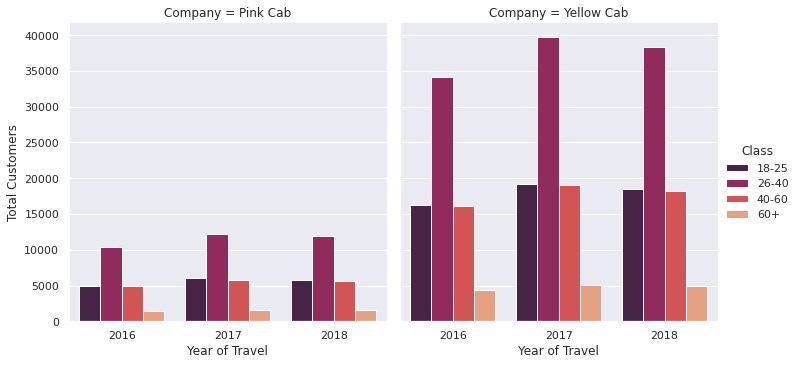

In [632]:

sns.catplot('Year of Travel','Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'rocket')
plt.show()

# **Clients analysis**

## **Loyalty Rates**

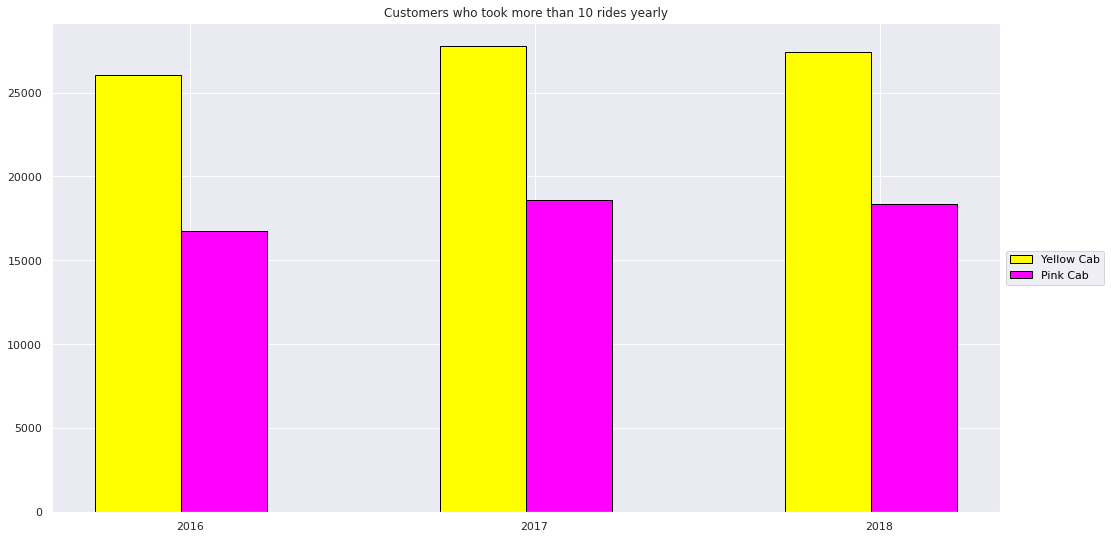

In [123]:
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_y.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='magenta',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides yearly')
plt.show()

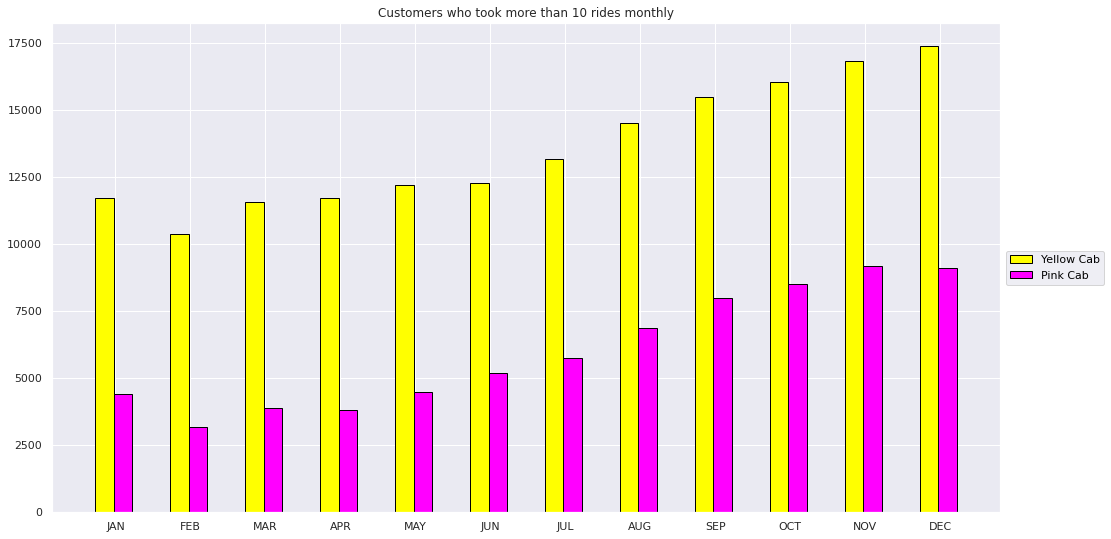

In [124]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
c10r_ym=[]
c10r_pm=[]
for month in months:
  yellow_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=10]
  c10r_ym.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Month of Travel']==month) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=10]
  c10r_pm.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(12)
plt.bar(X+0.00,c10r_ym,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_pm,color='magenta',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 10 rides monthly')
plt.show()

## **Payment Mode Distribution**

### **Payment Mode Distribution Yearly**

In [635]:
u=masterdata.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
u.columns = ['RidesPerYear']
u=u.reset_index(level='Year of Travel', col_level=1)
payment=masterdata.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(u,on= 'Year of Travel')
payment.head()
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']

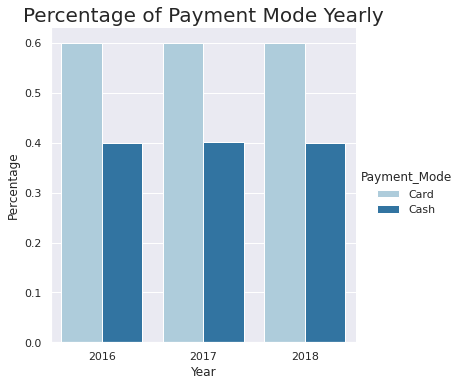

In [636]:
sns.catplot('Year of Travel','per',data=payment1,kind='bar',hue='Payment_Mode',palette="Paired")
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

### **Payment Mode Distribution citywise**

In [637]:
payment2=masterdata.groupby(['Year of Travel','Payment_Mode','City'])['Transaction ID'].agg(['count'])
payment2=payment2.reset_index(level='Year of Travel', col_level=1)
payment2=payment2.reset_index(level='Payment_Mode', col_level=1)
payment2=payment2.reset_index(level='City', col_level=1)
payment2 = payment2.sort_values(by='count', ascending= False )
payment2.head()

,City,Payment_Mode,Year of Travel,count
47,NEW YORK NY,Card,2017,21541
85,NEW YORK NY,Card,2018,20286
9,NEW YORK NY,Card,2016,17923
66,NEW YORK NY,Cash,2017,14451
104,NEW YORK NY,Cash,2018,13718


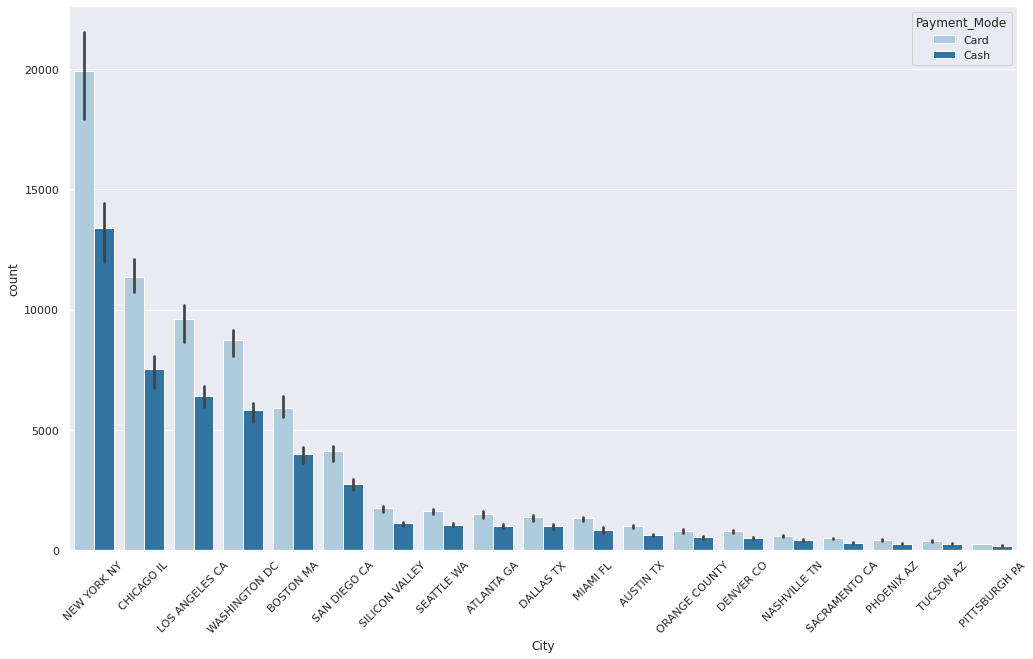

In [639]:
fig, ax = plt.subplots(figsize = (17, 10))

sns.barplot('City','count',data=payment2,hue='Payment_Mode',palette="Paired")
plt.xticks(rotation=45)
plt.show()

### **Payment Mode Distribution agewise**

In [640]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Payment_Mode', col_level=1)
a11['Class']= '18-25'


a22= a2.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Payment_Mode', col_level=1)
a22['Class']= '26-40'


a33= a3.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Payment_Mode', col_level=1)
a33['Class']= '40-60'


a44= a4.groupby(['Payment_Mode'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Payment_Mode', col_level=1)
a44['Class']= '60+'

payage=a11
payage=pd.concat([payage,a22,a33,a44])
payage.head()

x=payage.groupby('Class').sum()
x.columns=['Q']
x=x.reset_index(level='Class', col_level=1)
x.head()

payage=payage.merge(x,on='Class')
payage['per'] = payage['Total Customers']/payage['Q']
payage.head()

,Payment_Mode,Total Customers,Class,Q,per
0,Card,42308,18-25,70525,0.599901
1,Cash,28217,18-25,70525,0.400099
2,Card,87745,26-40,146603,0.598521
3,Cash,58858,26-40,146603,0.401479
4,Card,41843,40-60,69716,0.600192


<Figure size 2520x1080 with 0 Axes>

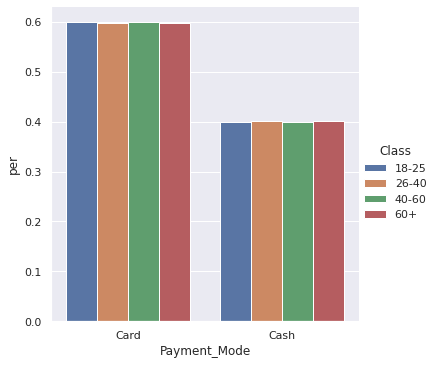

In [641]:
plt.figure(figsize=(35,15))
sns.catplot('Payment_Mode','per',data=payage,kind='bar',hue='Class')
plt.show()

# **Conclution**

After evaluated both companies on the next issues, I would recommend investing in Yellow Cab Company since:



1.   **Average Profits over KM, Rides and City:** Yellow Cab Company's profits are by far greater than Pink Cab Company in any ot the ways in which we analyse 

2.   **Loyalty Rates**: Yellow Cab Company shows a better customer's retention

3.   **Demand**: Yellow Cab Company has almost three times the level of Demand than Pink Cab Company





*PD: Deeper analysis will be showed in the presentaion*